In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_closefull.csv
!wget -nc https://lazyprogrammer.me/course_files/SPY.csv

--2020-10-08 01:05:27--  https://lazyprogrammer.me/course_files/sp500_closefull.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18464866 (18M) [text/csv]
Saving to: ‘sp500_closefull.csv’

sp500_closefull.csv 100%[===================>]  17.61M  6.61MB/s    in 2.7s    

2020-10-08 01:05:31 (6.61 MB/s) - ‘sp500_closefull.csv’ saved [18464866/18464866]

--2020-10-08 01:05:31--  https://lazyprogrammer.me/course_files/SPY.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 172.67.213.166, 104.31.80.48, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 251935 (246K) [text/csv]
Saving to: ‘SPY.csv’

SPY.csv             100%[===================>] 246.03K   343KB/s    in 0.7s    

2020-10-08 01:05

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('sp500_closefull.csv', index_col='Date', parse_dates=True)

In [ ]:
df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,GILD,NLSN,EQIX,TIF,MDT,V,QRVO,A,MO,SWKS,MCHP,CDNS,WLTW,CHTR,EIX,BBY,WBA,HCA,AJG,DTE,C,T,CF,DISH,MGM,XL,HUM,CBOE,CFG,WU,...,DLTR,HAS,WMT,NTAP,KIM,BAX,LMT,KEY,UNM,BMY,PSA,WYNN,RHI,EFX,NUE,PKG,NBL,CTSH,SWK,MU,TRV,L,AEP,CI,SNI,JNJ,WM,DOV,FTI,AGN,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,21.650000,NaN,109.559998,43.990002,43.900002,22.035000,NaN,22.389128,19.790001,14.82,29.180000,6.12,70.913910,NaN,34.770000,40.189999,37.299999,NaN,22.330000,43.540001,34.000000,28.580000,18.368000,21.180000,9.73,NaN,45.680000,NaN,NaN,19.090000,...,16.056667,32.540001,54.230000,34.189999,13.66,31.662140,76.849998,5.94,19.940001,25.629999,80.129997,63.959999,27.120001,31.469999,47.790001,23.389999,36.610001,23.400000,52.709999,10.85,49.810001,37.180000,34.939999,36.369999,NaN,64.680000,34.160000,28.395418,29.615000,40.290001,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,21.629999,NaN,108.540001,44.279999,44.799999,21.782499,NaN,22.145924,19.799999,15.05,28.719999,6.06,70.754967,35.0,34.459999,41.209999,37.000000,NaN,22.209999,43.049999,35.299999,28.440001,18.666000,21.049999,10.50,NaN,45.660000,NaN,NaN,19.010000,...,15.853333,32.180000,53.689999,33.590000,13.59,31.444866,77.650002,6.17,20.230000,25.230000,80.790001,67.849998,27.459999,31.459999,48.119999,23.690001,37.560001,23.665001,53.480000,11.17,48.630001,37.380001,34.540001,36.980000,NaN,63.930000,34.009998,28.261351,30.125000,39.889999,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,22.379999,NaN,109.529999,44.959999,45.330002,21.490000,NaN,22.067240,20.090000,14.91,28.480000,6.13,71.894043,35.0,34.889999,40.889999,36.720001,NaN,22.219999,43.230000,36.400002,27.610001,19.444000,20.700001,10.14,NaN,45.980000,NaN,NaN,19.000000,...,16.783333,32.150002,53.570000,33.349998,13.65,31.553503,76.510002,6.13,20.410000,25.219999,80.300003,66.959999,28.719999,31.799999,49.570000,23.570000,37.915001,23.665001,54.820000,11.22,47.939999,37.639999,34.889999,36.900002,NaN,64.449997,34.000000,28.596518,30.264999,40.020000,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,22.434999,NaN,107.290001,46.889999,45.750000,21.690001,NaN,22.038626,20.059999,14.74,28.330000,6.25,71.682121,35.0,34.680000,41.540001,36.939999,NaN,22.080000,42.830002,36.500000,27.299999,19.247999,20.790001,10.80,NaN,48.119999,NaN,NaN,19.610001,...,16.673334,31.690001,53.599998,33.270000,14.11,32.064095,74.410004,6.39,20.860001,25.240000,80.190002,68.389999,29.230000,31.930000,49.230000,23.400000,37.404999,22.770000,56.750000,10.84,48.630001,37.919998,35.189999,38.259998,NaN,63.990002,34.080002,29.226633,29.915001,39.700001,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,22.270000,NaN,106.769997,46.009998,45.990002,21.750000,NaN,22.031473,20.110001,15.00,28.500000,6.34,71.602646,33.5,34.500000,39.910000,36.990002,NaN,22.139999,43.160000,35.900002,27.100000,19.662001,21.160000,10.60,NaN,47.509998,NaN,NaN,19.799999,...,16.443333,31.770000,53.330002,33.540001,13.93,32.140141,75.610001,6.50,20.580000,24.820000,78.730003,67.900002,29.209999,31.940001,49.930000,24.950001,37.634998,23.430000,57.419998,11.10,48.560001,37.889999,35.610001,37.970001,NaN,64.209999,34.240002,30.064554,30.450001,39.410000,16.920000,

In [ ]:
df.shape

(2270, 480)

In [ ]:
# drop any columns with more 10 or more missing values
df.dropna(axis=1, thresh=len(df) - 10, inplace=True)

In [ ]:
df.shape

(2270, 430)

In [ ]:
df.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,GILD,EQIX,TIF,MDT,V,A,MO,SWKS,MCHP,CDNS,WLTW,CHTR,EIX,BBY,WBA,AJG,DTE,C,T,CF,DISH,MGM,HUM,WU,APH,SYY,MSI,FCX,ADM,LH,...,AEE,DLTR,HAS,WMT,NTAP,KIM,BAX,LMT,KEY,UNM,BMY,PSA,WYNN,RHI,EFX,NUE,PKG,NBL,CTSH,SWK,MU,TRV,L,AEP,CI,JNJ,WM,DOV,FTI,AGN,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-04,24.690001,12.80,54.400002,102.923332,40.349998,36.310001,76.570000,19.153616,56.180000,44.240002,21.650000,109.559998,43.990002,43.900002,22.035000,22.389128,19.790001,14.82,29.180000,6.12,70.913910,NaN,34.770000,40.189999,37.299999,22.330000,43.540001,34.000000,28.580000,18.368000,21.180000,9.73,45.680000,19.090000,22.969999,28.100000,32.218723,41.730000,31.469999,76.370003,...,27.760000,16.056667,32.540001,54.230000,34.189999,13.66,31.662140,76.849998,5.94,19.940001,25.629999,80.129997,63.959999,27.120001,31.469999,47.790001,23.389999,36.610001,23.400000,52.709999,10.85,49.810001,37.180000,34.939999,36.369999,64.680000,34.160000,28.395418,29.615000,40.290001,17.059999,18.705000,18.030001,61.630001,16.889999,39.880001,15.20,3.51000,238.580002,30.242558
2010-01-05,24.580000,13.91,55.009998,102.459999,38.790001,36.750000,76.650002,19.171511,58.020000,42.779999,21.629999,108.540001,44.279999,44.799999,21.782499,22.145924,19.799999,15.05,28.719999,6.06,70.754967,35.0,34.459999,41.209999,37.000000,22.209999,43.049999,35.299999,28.440001,18.666000,21.049999,10.50,45.660000,19.010000,22.490000,27.980000,31.774050,41.980000,31.639999,75.440002,...,27.650000,15.853333,32.180000,53.689999,33.590000,13.59,31.444866,77.650002,6.17,20.230000,25.230000,80.790001,67.849998,27.459999,31.459999,48.119999,23.690001,37.560001,23.665001,53.480000,11.17,48.630001,37.380001,34.540001,36.980000,63.930000,34.009998,28.261351,30.125000,39.889999,16.860001,18.625000,17.969999,60.790001,17.695000,39.610001,15.11,3.61500,239.610001,29.851370
2010-01-06,24.420000,13.27,54.150002,103.946663,38.299999,37.470001,76.419998,19.595024,59.779999,42.029999,22.379999,109.529999,44.959999,45.330002,21.490000,22.067240,20.090000,14.91,28.480000,6.13,71.894043,35.0,34.889999,40.889999,36.720001,22.219999,43.230000,36.400002,27.610001,19.444000,20.700001,10.14,45.980000,19.000000,22.575001,28.059999,32.218723,43.654999,31.559999,74.190002,...,27.459999,16.783333,32.150002,53.570000,33.349998,13.65,31.553503,76.510002,6.13,20.410000,25.219999,80.300003,66.959999,28.719999,31.799999,49.570000,23.570000,37.915001,23.665001,54.820000,11.22,47.939999,37.639999,34.889999,36.900002,64.449997,34.000000,28.596518,30.264999,40.020000,17.100000,18.592501,17.790001,60.900002,18.344999,39.430000,15.38,3.69500,234.669998,29.916569
2010-01-07,24.530001,13.55,54.110001,103.556664,37.990002,37.490002,75.970001,19.475725,62.200001,41.500000,22.434999,107.290001,46.889999,45.750000,21.690001,22.038626,20.059999,14.74,28.330000,6.25,71.682121,35.0,34.680000,41.540001,36.939999,22.080000,42.830002,36.500000,27.299999,19.247999,20.790001,10.80,48.119999,19.610001,22.424999,28.090000,32.865524,42.820000,31.230000,74.169998,...,27.200001,16.673334,31.690001,53.599998,33.270000,14.11,32.064095,74.410004,6.39,20.860001,25.240000,80.190002,68.389999,29.230000,31.930000,49.230000,23.400000,37.404999,22.770000,56.750000,10.84,48.630001,37.919998,35.189999,38.259998,63.990002,34.080002,29.226633,29.915001,39.700001,17.490000,18.510000,17.549999,61.160000,18.594999,39.360001,15.82,3.65125,237.250000,29.627834
2010-01-08,24.660000,13.33,53.900002,102.986664,37.779999,37.270000,76.120003,19.505550,61.599998,40.669998,22.270000,106.769997,46.009998,45.990002,21.750000,22.031473,20.110001,15.00,28.500000,6.34,71.602646,33.5,34.500000,39.910000,36.990002,22.139999,43.160000,35.900002,27.100000,19.662001,21.160000,10.60,47.509998,19.799999,22.590000,27.910000,31.369801,44.049999,30.840000,74.059998,...,27.010000,16.443333,31.770000,53.330002,33.540001,13.93,32.140141,75.610001,6.50,20.580000

In [ ]:
df.isna().sum().sum()

3011

In [ ]:
# forward fill and backfill
df.fillna(method='ffill', inplace=True)

In [ ]:
df.isna().sum().sum()

1

In [ ]:
df.fillna(method='bfill', inplace=True)

In [ ]:
df.isna().sum().sum()

0

In [ ]:
all_dates = df.index.unique().sort_values()

In [ ]:
start = all_dates.get_loc('2014-01-02')
end = all_dates.get_loc('2017-06-30')
dates = all_dates[start:end+1]

In [ ]:
# empty dataframe
returns = pd.DataFrame(index=all_dates[1:])

In [ ]:
for name in df.columns:
  current_returns = np.log(df[name]).diff()
  returns[name] = current_returns.iloc[1:]

In [ ]:
returns.head()

,CSCO,UAL,TROW,ISRG,PRGO,TPR,DVN,MRO,BA,VRTX,GILD,EQIX,TIF,MDT,V,A,MO,SWKS,MCHP,CDNS,WLTW,CHTR,EIX,BBY,WBA,AJG,DTE,C,T,CF,DISH,MGM,HUM,WU,APH,SYY,MSI,FCX,ADM,LH,...,AEE,DLTR,HAS,WMT,NTAP,KIM,BAX,LMT,KEY,UNM,BMY,PSA,WYNN,RHI,EFX,NUE,PKG,NBL,CTSH,SWK,MU,TRV,L,AEP,CI,JNJ,WM,DOV,FTI,AGN,M,CRM,PGR,WAT,BWA,LRCX,NWL,UAA,BLK,PPL
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-05,-0.004465,0.083163,0.011151,-0.004512,-0.039429,0.012045,0.001044,0.000934,0.032227,-0.033559,-0.000924,-0.009354,0.006571,0.020294,-0.011525,-0.010922,0.000505,0.015400,-0.015890,-0.009852,-0.002244,0.000000,-0.008956,0.025063,-0.008075,-0.005388,-0.011318,0.037522,-0.004911,0.016094,-0.006157,0.076161,-0.000438,-0.004199,-0.021118,-0.004280,-0.013898,0.005973,0.005387,-0.012252,...,-0.003970,-0.012744,-0.011125,-0.010008,-0.017705,-0.005138,-0.006886,0.010356,0.037990,0.014439,-0.015730,0.008203,0.059041,0.012459,-0.000318,0.006881,0.012744,0.025618,0.011261,0.014503,0.029067,-0.023975,0.005365,-0.011514,0.016633,-0.011663,-0.004401,-0.004733,0.017074,-0.009978,-0.011793,-0.004286,-0.003333,-0.013723,0.046560,-0.006793,-0.005939,0.029476,0.004308,-0.013019
2010-01-06,-0.006531,-0.047102,-0.015757,0.014405,-0.012713,0.019402,-0.003005,0.021850,0.029883,-0.017687,0.034086,0.009080,0.015240,0.011761,-0.013519,-0.003559,0.014540,-0.009346,-0.008392,0.011485,0.015971,0.000000,0.012401,-0.007795,-0.007596,0.000450,0.004172,0.030686,-0.029619,0.040835,-0.016767,-0.034887,0.006984,-0.000526,0.003772,0.002855,0.013898,0.039124,-0.002532,-0.016708,...,-0.006895,0.057007,-0.000933,-0.002238,-0.007171,0.004405,0.003449,-0.014790,-0.006504,0.008858,-0.000396,-0.006084,-0.013204,0.044863,0.010749,0.029688,-0.005078,0.009407,0.000000,0.024747,0.004466,-0.014290,0.006931,0.010082,-0.002166,0.008101,-0.000294,0.011790,0.004637,0.003254,0.014134,-0.001746,-0.010067,0.001808,0.036075,-0.004555,0.017711,0.021889,-0.020832,0.002182
2010-01-07,0.004494,0.020881,-0.000739,-0.003759,-0.008127,0.000534,-0.005906,-0.006107,0.039684,-0.012690,0.002455,-0.020663,0.042031,0.009223,0.009264,-0.001298,-0.001494,-0.011467,-0.005281,0.019387,-0.002952,0.000000,-0.006037,0.015771,0.005973,-0.006321,-0.009296,0.002743,-0.011291,-0.010131,0.004338,0.063058,0.045491,0.031601,-0.006667,0.001069,0.019876,-0.019313,-0.010511,-0.000270,...,-0.009513,-0.006576,-0.014411,0.000560,-0.002402,0.033144,0.016052,-0.027831,0.041539,0.021809,0.000793,-0.001371,0.021131,0.017602,0.004080,-0.006883,-0.007239,-0.013542,-0.038553,0.034601,-0.034455,0.014290,0.007411,0.008562,0.036193,-0.007163,0.002350,0.021795,-0.011632,-0.008028,0.022551,-0.004447,-0.013583,0.004260,0.013536,-0.001777,0.028207,-0.011911,0.010934,-0.009698
2010-01-08,0.005286,-0.016369,-0.003889,-0.005519,-0.005543,-0.005886,0.001973,0.001530,-0.009693,-0.020203,-0.007382,-0.004859,-0.018946,0.005232,0.002762,-0.000325,0.002489,0.017485,0.005983,0.014297,-0.001109,-0.043803,-0.005204,-0.040030,0.001353,0.002714,0.007675,-0.016575,-0.007353,0.021281,0.017640,-0.018692,-0.012758,0.009642,0.007331,-0.006429,-0.046579,0.028320,-0.012567,-0.001484,...,-0.007010,-0.013891,0.002521,-0.005050,0.008083,-0.012839,0.002369,0.015998,0.017068,-0.013514,-0.016780,-0.018375,-0.007191,-0.000684,0.000313,0.014119,0.064138,0.006130,0.028573,0.011737,0.023702,-0.001440,-0.000791,0.011865,-0.007609,0.003432,0.004684,0.028266,0.017726,-0.007332,-0.033133,0.001485,0.009075,0.000817,-0.018454,0.024841,-0.003166,-0.002056,0.007014,-0.003149
2010-01-11,-0.002843,-0.016642,0.007025,0.007513,0.043001,0.027783,-0.013757,0.000000,-0.011921,0.028123,0.007827,0.008208,0.014457,-0.003922,-0.002878,0.000649,0.007431,0.000666,-0.001405,0.000000,0.009939,0.000000,0.019234,-0.017185,0.001621,0.001354,0.014035,0.011080,-0.004809,-0.001120,0.003303,0.027909,-0.011857,0.008549,0.002432,-0.002152,-0.010363,-0.000114,0.000648,0.011145,...,0.008112,-0.005488,-0.000945,0.016366,-0.018051,0.014255,-0.005763,0.004750,0.004605,0.018296,0.01042

In [ ]:
X = returns.to_numpy()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
X.shape

(2269, 430)

In [ ]:
from sklearn.decomposition import PCA
model = PCA()
Z = model.fit_transform(X)

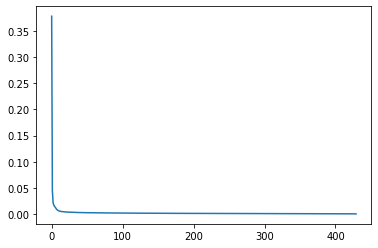

In [ ]:
plt.plot(model.explained_variance_ratio_);

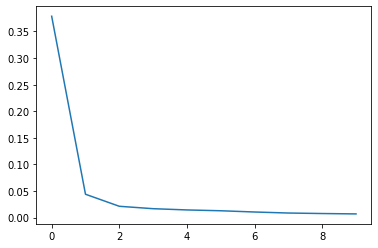

In [ ]:
plt.plot(model.explained_variance_ratio_[:10]);

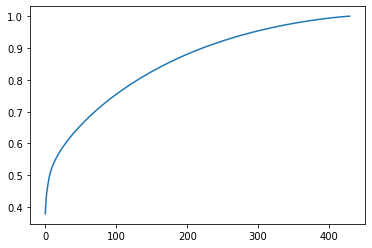

In [ ]:
cumulative_variance = np.cumsum(model.explained_variance_ratio_)
plt.plot(cumulative_variance);

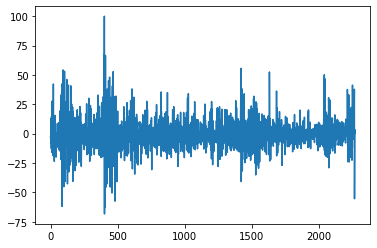

In [ ]:
# Plot first principal component vs S&P
plt.plot(Z[:,0]);

In [ ]:
Z_df = pd.DataFrame(index=returns.index)
Z_df['PC1'] = Z[:,0]

In [ ]:
spy = pd.read_csv('SPY.csv', index_col='Date', parse_dates=True)

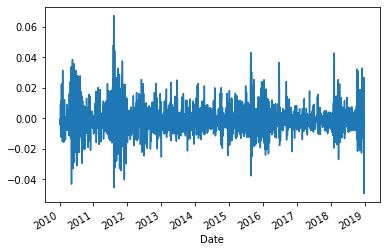

In [ ]:
spy_returns = -np.log(spy['Close']).diff().dropna()
spy_returns.plot();

In [ ]:
joined = Z_df.join(spy_returns)

In [ ]:
joined.head()

,PC1,Close
Date,,
2010-01-05,-3.082268,-0.002644
2010-01-06,-1.658736,-0.000704
2010-01-07,-7.838046,-0.004212
2010-01-08,-3.300012,-0.003322
2010-01-11,-3.664966,-0.001396


In [ ]:
joined.columns = ['PC1', 'SPY']

scaler2 = StandardScaler()
joined[['PC1', 'SPY']] = scaler2.fit_transform(joined)

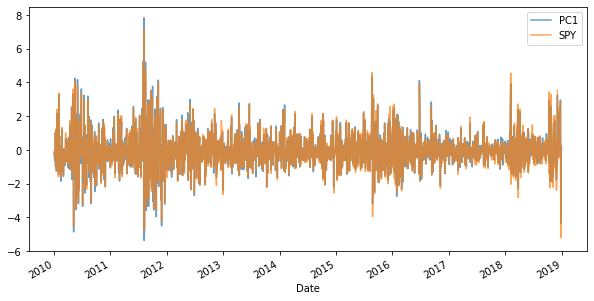

In [ ]:
joined.plot(figsize=(10, 5), alpha=0.7);